In [1]:
# Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

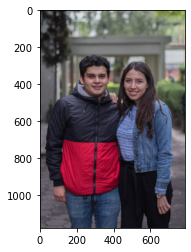

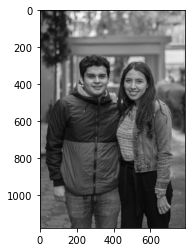

La dimensión de la imagen es: (1179, 786)
b) Graficar la matriz de la imagen original y la matriz con rank = k


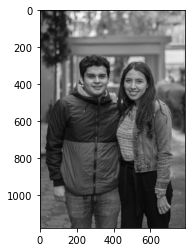

El número de columnas k que cumple la condición es: 23


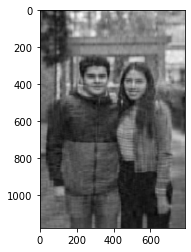

In [2]:
# Importar imagen
imagen = Image.open('SE.png')
imagen_gris = imagen.convert('LA')   ## Convertir a escala de grises
plt.imshow(imagen)
plt.show()

## Convertir la imagen a una matriz

imagen_mat = np.array(list(imagen_gris.getdata(band=0)), float)
imagen_mat.shape = (imagen_gris.size[1], imagen_gris.size[0])
imagen_mat = np.matrix(imagen_mat)

plt.imshow(imagen_mat, cmap='gray')
plt.show()

print('La dimensión de la imagen es: '+str(imagen_mat.shape))

U, Sigma, Vt = np.linalg.svd(imagen_mat, full_matrices=False) # SDV 


print("b) Graficar la matriz de la imagen original y la matriz con rank = k")

plt.imshow(imagen_mat, cmap='gray')
plt.show()

for i in range(1,100):
    j = i
    matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])
    cond = np.linalg.norm(imagen_mat - matriz_equivalente)/np.linalg.norm(imagen_mat)
    #print(cond)
    if cond <= 0.1:
        print("El número de columnas k que cumple la condición es: "+str(i))
        break
        
j = i
matriz_equivalente = np.matrix(U[:, :j]) * np.diag(Sigma[:j]) * np.matrix(Vt[:j, :])

plt.imshow(matriz_equivalente, cmap='gray')
plt.show()

In [3]:
matriz_equivalente.shape

(1179, 786)

A la misma imagen del ejercicio 1, aplicar PCA

In [4]:
from sklearn.decomposition import PCA

In [5]:
# Función para PCA
def PCA_from_SVD(A):
    """
    Función para PCA a partir de la SVD de numpy 
    params: A			matriz de datos
    return: valores_singulares	Los valores singulares de la descomposición SVD
	    componentes		Los coeficientes para calcular los componentes principales
	    Z			Los datos transformados (componentes principales)
	    varianza_explicada	La varianza explicada por cada componente principal
    """
    
    # Centrar los datos
    A = np.array(A) # convertir los datos a un numpy array por si vienen de un DataFrame
    A_centered = A - A.mean(axis=0)
    
    # Calcular SVD
    U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)
    
    # Los valores singulares
    valores_singulares = S
    
    # Los componentes (coeficientes)
    componentes = ((Vt.T))
    
    # Los datos transformados (componentes principales)
    Z = A_centered@np.transpose(Vt)
    
    # La varianza explicada
    varianza_explicada = S**2/np.sum(S**2)
    
   
    # regresar 4 objetos
    return valores_singulares, componentes.T, Z, varianza_explicada

In [6]:
# Ejecutar función
valores_singulares, coeficientes, Z, varianza_explicada = PCA_from_SVD(imagen_mat)

In [7]:
valores_singulares

array([2.86093189e+04, 1.46370021e+04, 1.04597237e+04, 9.23674408e+03,
       7.74213094e+03, 7.04063792e+03, 5.87104629e+03, 5.49564036e+03,
       4.91506773e+03, 4.55370422e+03, 4.28465539e+03, 4.12591864e+03,
       3.77248942e+03, 3.50896827e+03, 3.47368808e+03, 2.94636512e+03,
       2.84171869e+03, 2.72885466e+03, 2.54779111e+03, 2.32797543e+03,
       2.13675755e+03, 2.09434909e+03, 2.04443432e+03, 1.94058937e+03,
       1.83193605e+03, 1.75383249e+03, 1.69529020e+03, 1.64048287e+03,
       1.62041092e+03, 1.57095994e+03, 1.50588277e+03, 1.46787778e+03,
       1.42240800e+03, 1.38319659e+03, 1.33293992e+03, 1.29903070e+03,
       1.24015217e+03, 1.22716548e+03, 1.18565537e+03, 1.15013410e+03,
       1.12146027e+03, 1.10198728e+03, 1.06632556e+03, 1.05605832e+03,
       1.02207161e+03, 1.00484999e+03, 9.84087826e+02, 9.66306650e+02,
       9.34025570e+02, 9.13006801e+02, 8.98402100e+02, 8.89091666e+02,
       8.75488584e+02, 8.71644907e+02, 8.19677012e+02, 8.13937855e+02,
      

In [8]:
coeficientes

array([[ 0.00640825,  0.00668048,  0.00704863, ..., -0.04540147,
        -0.04547303, -0.04543817],
       [ 0.00554123,  0.00538504,  0.00525965, ...,  0.01813978,
         0.01762488,  0.017566  ],
       [ 0.02816674,  0.02883947,  0.02996461, ..., -0.02631604,
        -0.02457982, -0.02418379],
       ...,
       [-0.02926865,  0.04133315,  0.03386229, ...,  0.02235463,
         0.05041084, -0.04787299],
       [-0.01726315,  0.02480976, -0.04763823, ..., -0.01099817,
        -0.39055122,  0.39254468],
       [ 0.02727798, -0.04371068,  0.00837902, ...,  0.00926658,
         0.21817247, -0.21633345]])

In [9]:
# Z es nuestro nuevo data frame de datos transformados 
print(Z)

[[-1.63276177e+03 -1.25773511e+02 -4.20184396e+02 ... -5.44920378e-02
  -1.90934593e-02  6.07577595e-02]
 [-1.61737028e+03 -1.32067322e+02 -4.06826519e+02 ...  3.74315588e-02
  -4.40781675e-02 -7.21965483e-02]
 [-1.59646857e+03 -1.42709934e+02 -3.93721975e+02 ...  1.27482951e-01
   1.03061661e-01 -5.41834433e-02]
 ...
 [ 8.49995973e+02 -3.96589458e+02 -2.14013728e+02 ...  2.06729827e-02
   8.19624444e-02  6.52576598e-02]
 [ 8.48437794e+02 -3.95323488e+02 -2.14267647e+02 ...  9.74147594e-03
  -4.02640331e-02  8.60582561e-03]
 [ 8.47179969e+02 -3.94569050e+02 -2.13690935e+02 ... -2.72222085e-02
  -3.95845054e-02 -5.11860122e-02]]


In [10]:
Z.shape

(1179, 786)

In [11]:
varianza_explicada[0] + varianza_explicada[1] + varianza_explicada[2] +varianza_explicada[3] + varianza_explicada[4]+ varianza_explicada[5]

0.8129629897788109

In [12]:
Z[:5,:].shape

(5, 786)

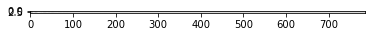

In [13]:
plt.imshow(Z[:5,:], cmap='gray')
plt.show()

Calcular la pseudo inversa de las siguientes matrices

In [14]:
def pseudoinversa(M):
    U, S, Vt = np.linalg.svd(M, full_matrices = True)
    pseudoinversa =  Vt.T@(np.diag(1/S))@U.T
    return pseudoinversa

In [15]:
X1 = np.array([[1,0],[1,2]])
print("La matriz X1 es: ")
print(X1)
X_1Inv= np.linalg.inv(X1)
print("La matriz inversa con numpy de X1 es: ")
print(X_1Inv)
X_1PsInv = pseudoinversa(X1)
print("La matriz pseudoinversa de X1 es: ")
print(X_1PsInv)

######################################
print("Comprobación con inversa de numpy: ")
print(np.round(X1@X_1Inv,8))
print("Comprobación con pseudoinversa: ")
print(np.round(X1@X_1PsInv,8))

La matriz X1 es: 
[[1 0]
 [1 2]]
La matriz inversa con numpy de X1 es: 
[[ 1.   0. ]
 [-0.5  0.5]]
La matriz pseudoinversa de X1 es: 
[[ 1.00000000e+00  1.11022302e-16]
 [-5.00000000e-01  5.00000000e-01]]
Comprobación con inversa de numpy: 
[[1. 0.]
 [0. 1.]]
Comprobación con pseudoinversa: 
[[ 1.  0.]
 [-0.  1.]]


La pseudoinversa es $X^{+}$ tal que: 
\begin{equation}
XX^{+}  \approx  I_{n}
\end{equation}
Y minimizando esta expresión:
\begin{equation}
|| XX^{+} - I_{n} ||_{2}
\end{equation}
La solución es: 
\begin{equation}
X^{+} = V \Sigma^{+} U^{T}
\end{equation}

$\Sigma^{+}$ es la pseudoinversa de $\Sigma$, $\Sigma$ es una matriz diagonal y, por lo tanto, $\Sigma^{+}$ se puede calcular tomando el recíproco de los valores distintos de cero de $\Sigma$.

In [16]:
def pseudoinversa_rec(M):
    U, S, Vt = np.linalg.svd(M, full_matrices = True)
    S_ = np.zeros((M.shape[0], M.shape[1])).T
    S_[:S.shape[0],:S.shape[0]] = np.linalg.inv(np.diag(S))

    pseudoinversa_rec =  Vt.T@(S_)@U.T
    return pseudoinversa_rec

In [17]:
X2 = np.array([[1,0,8],[1,2,-1]])
print("La matriz X2 es: ")
print(X2)
print("La matriz pseudoinversa con numpy de X2 es: ")
X2_Inv = np.linalg.pinv(X2)
print(X2_Inv)
X2_PsInv = pseudoinversa_rec(X2)
print("La matriz pseudoinversa de X2 es: ")
print(X2_PsInv)

######################################
print("Comprobación con pseudoinversa de numpy: ")
print(np.round(X2@X2_Inv,8))
print("Comprobación con pseudoinversa: ")
print(np.round(X2@X2_PsInv,8))

La matriz X2 es: 
[[ 1  0  8]
 [ 1  2 -1]]
La matriz pseudoinversa con numpy de X2 es: 
[[ 0.03812317  0.2111437 ]
 [ 0.04105572  0.38123167]
 [ 0.1202346  -0.02639296]]
La matriz pseudoinversa de X2 es: 
[[ 0.03812317  0.2111437 ]
 [ 0.04105572  0.38123167]
 [ 0.1202346  -0.02639296]]
Comprobación con pseudoinversa de numpy: 
[[ 1.  0.]
 [-0.  1.]]
Comprobación con pseudoinversa: 
[[ 1.  0.]
 [-0.  1.]]


1. Resolver los siguientes sistemas de ecuaciones $Ax = b$. Tip: al igual que en el ejercico anterior, utilizar la pseudo inversa.
\
a) $A=\begin{pmatrix} 1 & 0 & 8 \\ 1 & 2 & -1 \end{pmatrix}$, $b=\begin{pmatrix} 2 \\ 1 \end{pmatrix}$

In [18]:
A = np.array([[1,0,8], [1,2,-1]])
b = np.array([[2],[1]])
sol = pseudoinversa_rec(X2)@b
print("La solución x es: ")
print(sol)
print("Comprobación: ")
print(A@sol)

La solución x es: 
[[0.28739003]
 [0.46334311]
 [0.21407625]]
Comprobación: 
[[2.]
 [1.]]


b) $A=\begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix}$, $b=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ Notar que $b$ no está en la imagen de $A$.

In [19]:
A = np.array([[1,1,],[0,0]])
b = np.array([[1],[1]])

In [20]:
U, S, Vt = np.linalg.svd(A, full_matrices = True)
S2 = np.array([1/S[0],0])
x = (Vt.T @(np.diag(S2))@U.T)@b
x

array([[0.5],
       [0.5]])

In [21]:
A@x

array([[1.],
       [0.]])

Probar que para una matriz que se puede descomponer en el producto de 3 matrices de la siguiente forma $D=Q \Lambda Q^{T}$ con $Q$ una matriz ortogonal y $\Lambda$ una matriz diagonal, entonces se cumple que la k-ésima potendia de $D$ es $D^{k} = Q \Lambda^{k} Q^{t}$.

![alt text](Prueba.jpg "Prueba")